# Data Exploration Code
This notebook contains all code relevant to the data exploration sections. (Subsections 1)

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in data
kof_df = pd.read_csv('Datasets/KOF_clean.csv')
dataset_list = ['CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 
    'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean', 'MASI-MAR-Clean',
    'NASI-KEN-Clean', 'FTSE_JSE-ZAF-Clean']

countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for df_name in dataset_list:
    df = pd.read_csv('./Datasets/' + df_name + '.csv')
    countries_df = pd.concat([countries_df, df])

kof_df = kof_df.merge(countries_df, on=['year', 'code'])

# Create the lagged Volatility variable
kof_df['volatility_lagged'] = kof_df.groupby(by='code')['volatility'].shift(1)

# Drop the rows with missing values after shifting
kof_df = kof_df.dropna()

/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_66271/575330119.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  countries_df = pd.concat([countries_df, df])


In [3]:
total_index_plot = alt.Chart(kof_df).mark_point().encode(
    x=alt.X('KOFGI').scale(domain=[25, 95]),
    y='YoY Change:Q',
    color=alt.Color('country:N', title='Country')
).properties(
    title='KOF Total Globalisation Index vs. YoY Change in Stock Market Index'
)

fin_index_plot = alt.Chart(kof_df).mark_point().encode(
    x=alt.X('KOFFiGI').scale(domain=[0, 100]),
    y='YoY Change:Q',
     color=alt.Color('country:N', title='Country')
).properties(
    title='KOF Financial Globalisation Index vs. YoY Change in Stock Market Index'
)

total_index_plot | fin_index_plot

/Users/andrew/anaconda3/envs/les-pingouins/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [4]:
alt.Chart(kof_df).mark_point().encode(
    x=alt.X('KOFFiGI').scale(domain=[0, 100]),
    y='YoY Change:Q',
     color=alt.Color('country:N', title='Country')
).properties(
    title='KOF Financial Globalisation Index vs. YoY Change in Stock Market Index'
)

/Users/andrew/anaconda3/envs/les-pingouins/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Text(0.5, 1.0, 'Correlation Matrix of KOF Globalisation Indices and YoY Change in Stock Market Index')

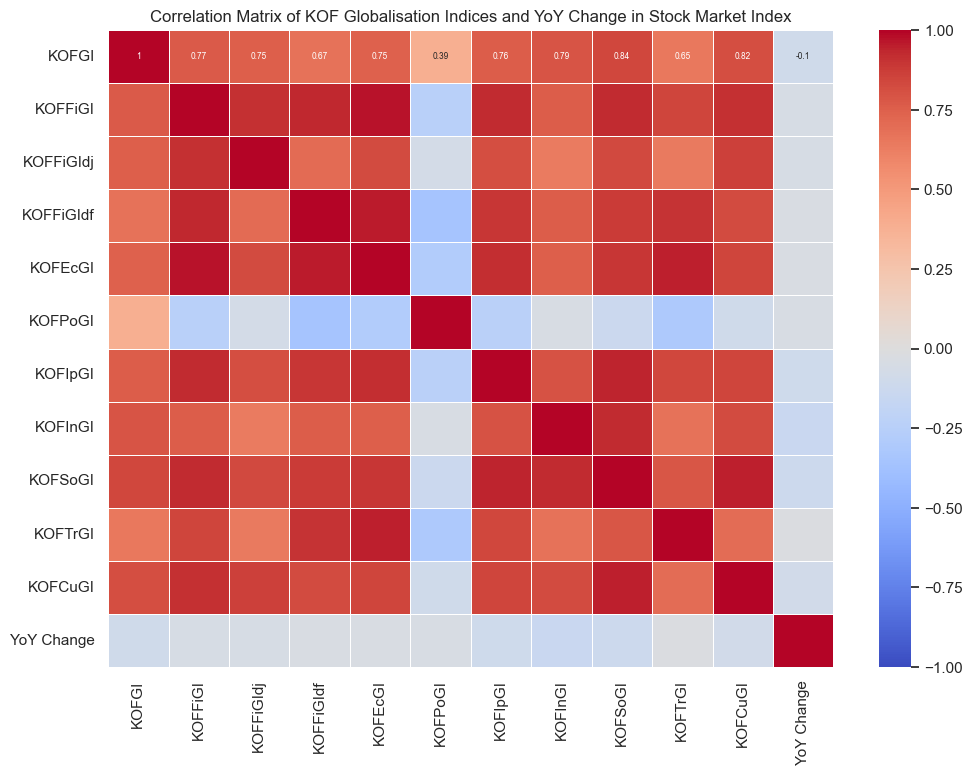

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = kof_df[['KOFGI', 'KOFFiGI', 'KOFFiGIdj', 'KOFFiGIdf', 'KOFEcGI', 'KOFPoGI', 'KOFIpGI', 'KOFInGI', 'KOFSoGI', 'KOFTrGI', 'KOFCuGI', 'YoY Change']].corr()
ax=plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6},
            vmin=-1,
            vmax=1, 
            ax=ax)

ax.set_title('Correlation Matrix of KOF Globalisation Indices and YoY Change in Stock Market Index')

In [6]:
# Load world bank data

wb_df = pd.read_csv('Datasets/KOF_World_Bank_merged.csv')
wb_df['pre2008'] = np.where(wb_df['year'] <= 2008, 1, 0)
wb_df = wb_df.sort_values(by=['code', 'year'])
wb_df['pct_change_lagged'] = wb_df.groupby(by='code')['Pct Change'].shift(1)
wb_df = wb_df.dropna()
# Drop an outlier point
wb_df = wb_df[wb_df['Pct Change'] <=200]
wb_df['direction_bin'] = np.where(wb_df['Pct Change'] > 0, 1, 0)

In [7]:
wb_total_index_plot = alt.Chart(wb_df).mark_circle().encode(
    x=alt.X('KOFGI').scale(zero=False),
    y='Pct Change:Q',
    tooltip=['country']
).properties(
    title='KOF GI vs. yearly Pct Change, World Bank Data'
)

wb_fin_index_plot = alt.Chart(wb_df).mark_circle().encode(
    x=alt.X('KOFFiGI').scale(zero=False),
    y='Pct Change:Q',
    tooltip=['country']
).properties(
    title='KOF Financial GI vs. yearly Pct Change, World Bank Data'
)

wb_total_index_plot | wb_fin_index_plot

/Users/andrew/anaconda3/envs/les-pingouins/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

Text(0.5, 1.0, 'Correlation Matrix of KOF Globalisation Indices and yearly Pct Change in World Bank dataset')

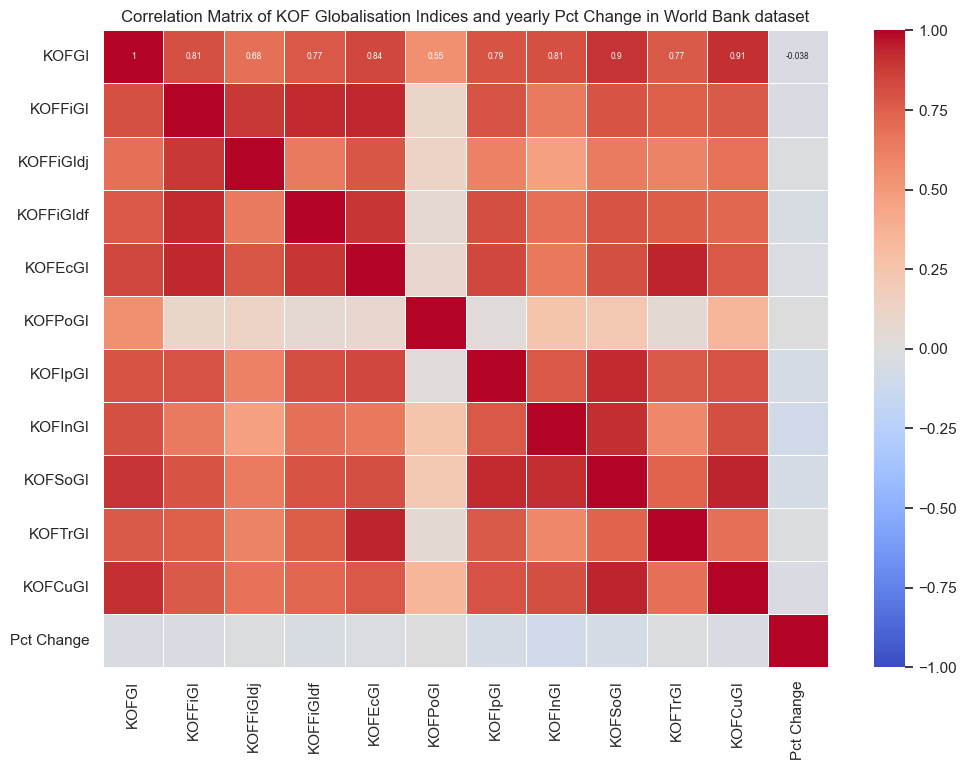

In [8]:
# Correlation heatmap for world bank data
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = wb_df[['KOFGI', 'KOFFiGI', 'KOFFiGIdj', 'KOFFiGIdf', 'KOFEcGI', 'KOFPoGI', 'KOFIpGI', 'KOFInGI', 'KOFSoGI', 'KOFTrGI', 'KOFCuGI', 'Pct Change']].corr()
ax=plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6},
            vmin=-1,
            vmax=1, 
            ax=ax)

ax.set_title('Correlation Matrix of KOF Globalisation Indices and yearly Pct Change in World Bank dataset')